# Example of high-level interface

In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
from tqdm import tqdm
from itertools import compress
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

In [2]:
DEVICE = 'cpu'#'cuda:0'
SIGMA=0.01

## Toy generative model

In [3]:
def model(z):
    T = np.array([[1, 1.], [0, 1.], [0, 1.]])
    #n = np.random.randn(3)*sigma
    x = T.dot(z) #+ n
    return x

In [4]:
def noisemodel(x, z = None, noiselevel = 1.):
    n=np.random.randn(3)*SIGMA
    return x+n

## Mock data generation

In [5]:
z0 = np.array([0.4, 0.6])
x0 = noisemodel(model(z0))
print(x0, z0)

[1.00228273 0.6102689  0.59160415] [0.4 0.6]


## Automatic inference 1-dim and 2-dim posteriors

In [6]:
ds1=swyft.DataStore()

In [7]:
sw = swyft.SWYFT(x0, model,datastore=ds1, zdim = 2, device = DEVICE, head = None, noisemodel = noisemodel)

In [8]:
#sw.run(nrounds = 4, max_epochs = 20, early_stopping_patience = 3, nsamples = 2500, nbatch = 32, recycle_net = False, threshold = 1e-8)
sw.run(nworkers=0,nrounds = 4, max_epochs = 20, early_stopping_patience = 3, nsamples = 1000, nbatch = 32, recycle_net = False, threshold = 1e-6)

Extracting samples.: 100%|██████████| 992/992 [00:00<00:00, 35383.23it/s]


Adding 992 new samples.
Extracted 992 samples
Start training
LR iteration 0
Total epochs: 20
Validation losses: [5.218852609395981, 3.4335649460554123, 2.1020075976848602, 1.5684871599078178, 1.4155585542321205, 1.4224883913993835, 1.1894392110407352, 1.135913085192442, 1.1524369567632675, 1.0671833455562592, 1.0590778570622206, 1.1024244502186775, 1.0520592220127583, 1.141831699758768, 0.9473536126315594, 1.016559910029173, 0.9631109572947025, 0.8945727553218603, 1.0342751033604145, 0.9299367014318705]
LR iteration 1
Total epochs: 8
Validation losses: [0.8855501059442759, 0.899841658771038, 0.8511437699198723, 0.8500730134546757, 0.7730427701026201, 0.776067104190588, 0.79596858471632, 0.8414480546489358]
LR iteration 2
Total epochs: 4
Validation losses: [0.8047806918621063, 0.8131854329258204, 0.8229380901902914, 0.8351410701870918]


Extracting samples.: 100%|██████████| 1895/1895 [00:00<00:00, 29487.16it/s]


Adding 903 new samples.
Extracted 964 samples
Start training
LR iteration 0
Total epochs: 11
Validation losses: [5.245539516210556, 3.4114950448274612, 2.551732651889324, 2.283079154789448, 2.2197389379143715, 2.1218271031975746, 2.0426696985960007, 1.9493581876158714, 2.329576425254345, 2.1243316903710365, 2.1829559728503227]
LR iteration 1
Total epochs: 7
Validation losses: [1.9714464470744133, 1.947877936065197, 2.006569765508175, 1.8873450830578804, 1.925974689424038, 1.910259686410427, 1.91600052267313]
LR iteration 2
Total epochs: 9
Validation losses: [1.9727540239691734, 2.061018295586109, 1.9319547414779663, 1.9712147936224937, 1.9486655816435814, 1.8203632533550262, 1.8978716880083084, 1.84079147875309, 1.9585620686411858]


Extracting samples.: 100%|██████████| 2277/2277 [00:00<00:00, 25610.14it/s]


Adding 382 new samples.
Extracted 984 samples
Start training
LR iteration 0
Total epochs: 13
Validation losses: [5.250407248735428, 3.4914977997541428, 2.7777127623558044, 2.484252616763115, 2.392393670976162, 2.716043084859848, 2.406464748084545, 2.356820300221443, 2.3002506494522095, 2.1967726349830627, 2.4710193052887917, 2.314116083085537, 2.3298293203115463]
LR iteration 1
Total epochs: 9
Validation losses: [2.2292709052562714, 2.2425479367375374, 2.2026242464780807, 2.224229983985424, 2.2592383697628975, 2.1853426098823547, 2.2083216831088066, 2.28874172270298, 2.2039510384202003]
LR iteration 2
Total epochs: 5
Validation losses: [2.2295902743935585, 2.1864375174045563, 2.2349428460001945, 2.3172877058386803, 2.202011838555336]


Extracting samples.: 100%|██████████| 2318/2318 [00:00<00:00, 19748.81it/s]


Adding 41 new samples.
Extracted 967 samples
Start training
LR iteration 0
Total epochs: 7
Validation losses: [5.288861632347107, 3.8036744445562363, 2.6596029177308083, 2.379443898797035, 2.419454112648964, 2.4063383117318153, 2.4292808324098587]
LR iteration 1
Total epochs: 4
Validation losses: [2.292438805103302, 2.326846219599247, 2.3537393361330032, 2.295471638441086]
LR iteration 2
Total epochs: 6
Validation losses: [2.363676533102989, 2.2839179262518883, 2.2661526426672935, 2.343444347381592, 2.292711466550827, 2.349043868482113]


In [11]:
z1 = np.array([0.32, 0.52])
x1 = noisemodel(model(z1))
print(x1, z1)

[0.83435471 0.52324571 0.51993435] [0.32 0.52]


In [13]:
len(ds1.x)

4881

In [14]:
len(ds1.z)

4881

In [20]:
len(ds2.x)

4881

In [21]:
len(ds2.z)

4881

In [27]:
#reset u to zero?

In [13]:
dsx2=[]
for elm in ds1.x:
    dsx2.append(elm)

In [14]:
ds2=swyft.DataStore(z=np.copy(ds1.z), x=dsx2, u=ds1.u)

In [17]:
sw2 = swyft.SWYFT(x1, model, datastore=ds1, zdim = 2, device = DEVICE, head = None, noisemodel = noisemodel)

In [18]:
sw2.run(nworkers=0,nrounds = 4, max_epochs = 20, early_stopping_patience = 3, nsamples = 1000, nbatch = 32, recycle_net = False, threshold = 1e-6)

Extracting samples.: 100%|██████████| 2318/2318 [00:00<00:00, 24453.32it/s]


Extracted 992 samples
Start training
LR iteration 0
Total epochs: 20
Validation losses: [5.266662776470184, 3.6566356420516968, 2.268311843276024, 1.9753010794520378, 1.6348282098770142, 1.4943896755576134, 1.499205145984888, 1.3186274506151676, 1.171418473124504, 1.1684990711510181, 1.1389568615704775, 1.3671923205256462, 1.1179192177951336, 1.1202970426529646, 1.109072720631957, 1.1528515461832285, 1.0435813199728727, 1.1179619282484055, 1.0556492637842894, 1.1633810102939606]
LR iteration 1
Total epochs: 16
Validation losses: [0.9686193075031042, 0.9308356773108244, 0.900135263800621, 0.8986252471804619, 0.8735653907060623, 0.887877032160759, 0.8933277651667595, 0.8733071926981211, 0.8625754993408918, 0.9256457667797804, 0.847899442538619, 0.8717181999236345, 0.8416361678391695, 0.8653689213097095, 0.907516909763217, 0.8846928719431162]
LR iteration 2
Total epochs: 7
Validation losses: [0.9125208668410778, 0.8735187035053968, 0.9002173226326704, 0.8523997273296118, 0.919986678287386

Extracting samples.:  77%|███████▋  | 2174/2826 [00:00<00:00, 21739.61it/s]

Adding 508 new samples.


Extracting samples.: 100%|██████████| 2826/2826 [00:00<00:00, 21808.80it/s]


Extracted 960 samples
Start training
LR iteration 0
Total epochs: 12
Validation losses: [5.25820255279541, 3.4493216425180435, 2.729797139763832, 2.300300754606724, 2.28304036706686, 2.2875265032052994, 2.2226452082395554, 2.0466086640954018, 1.9239699468016624, 2.2346351146698, 2.0691586658358574, 2.1460825204849243]
LR iteration 1
Total epochs: 5
Validation losses: [1.9928639605641365, 1.9191072434186935, 1.947877712547779, 1.9943061619997025, 1.959738478064537]
LR iteration 2
Total epochs: 4
Validation losses: [1.8704170882701874, 1.9157277196645737, 1.9951454401016235, 1.9058863371610641]


Extracting samples.: 100%|██████████| 3044/3044 [00:00<00:00, 19539.62it/s]


Adding 218 new samples.
Extracted 952 samples
Start training
LR iteration 0
Total epochs: 15
Validation losses: [5.279572427272797, 3.6696796864271164, 2.9789214581251144, 2.685420870780945, 2.5183608159422874, 2.401501402258873, 2.5398984998464584, 2.506784252822399, 2.3877665027976036, 2.343448258936405, 2.3888975605368614, 2.2854015603661537, 2.4611640721559525, 2.3362977728247643, 2.3803122267127037]
LR iteration 1
Total epochs: 4
Validation losses: [2.2891437262296677, 2.3514495342969894, 2.3085670471191406, 2.3320099487900734]
LR iteration 2
Total epochs: 11
Validation losses: [2.2729582861065865, 2.3515866473317146, 2.269321709871292, 2.243683971464634, 2.333637647330761, 2.2429729849100113, 2.323737993836403, 2.232056140899658, 2.360010400414467, 2.3194617182016373, 2.320028893649578]


Extracting samples.: 100%|██████████| 3063/3063 [00:00<00:00, 17672.60it/s]


Adding 19 new samples.
Extracted 945 samples
Start training
LR iteration 0
Total epochs: 16
Validation losses: [5.2891800701618195, 3.516147345304489, 2.8640149161219597, 2.7258872017264366, 2.705621786415577, 2.6485945358872414, 2.626442924141884, 2.5215650349855423, 2.586925059556961, 2.5665387511253357, 2.4884903505444527, 2.6176362335681915, 2.3108391910791397, 2.471123181283474, 2.5725448951125145, 2.499170020222664]
LR iteration 1
Total epochs: 7
Validation losses: [2.41850595921278, 2.4645150750875473, 2.4023321345448494, 2.2908882424235344, 2.322912186384201, 2.412992224097252, 2.3128084018826485]
LR iteration 2
Total epochs: 4
Validation losses: [2.325299635529518, 2.362352676689625, 2.358491539955139, 2.3465441465377808]


In [21]:
sw2.run(nworkers=0,nrounds = 2, max_epochs = 20, early_stopping_patience = 3, nsamples = 1000, nbatch = 32, recycle_net = False, threshold = 1e-6)

Extracting samples.:  97%|█████████▋| 3082/3181 [00:00<00:00, 15915.65it/s]

Adding 118 new samples.


Extracting samples.: 100%|██████████| 3181/3181 [00:00<00:00, 15195.97it/s]


Extracted 926 samples
Start training
LR iteration 0
Total epochs: 8
Validation losses: [5.357679635286331, 3.972850203514099, 3.3805179446935654, 2.6352450773119926, 2.434058114886284, 2.511886566877365, 2.6474055126309395, 2.508711487054825]
LR iteration 1
Total epochs: 10
Validation losses: [2.452042579650879, 2.471337951719761, 2.4589568749070168, 2.4064393788576126, 2.3535488322377205, 2.4041760489344597, 2.2873836532235146, 2.332639701664448, 2.3306035473942757, 2.377948358654976]
LR iteration 2
Total epochs: 12
Validation losses: [2.4386427775025368, 2.3131034672260284, 2.31141447275877, 2.360643856227398, 2.334573730826378, 2.2990215569734573, 2.397607631981373, 2.3412291407585144, 2.2562437802553177, 2.3036584854125977, 2.286653332412243, 2.464178279042244]


Extracting samples.:  42%|████▏     | 1426/3391 [00:00<00:00, 14259.27it/s]

Adding 210 new samples.


Extracting samples.: 100%|██████████| 3391/3391 [00:00<00:00, 11540.21it/s]


Extracted 971 samples
Start training
LR iteration 0
Total epochs: 11
Validation losses: [5.25957864522934, 3.355263829231262, 2.42876198887825, 2.182121604681015, 2.2725714668631554, 2.1598221138119698, 2.1048244535923004, 1.9937417656183243, 2.0955047085881233, 2.085643533617258, 2.039237469434738]
LR iteration 1
Total epochs: 9
Validation losses: [1.9797584041953087, 1.9310708120465279, 1.9181988909840584, 1.9464240595698357, 1.9353791140019894, 1.8438329920172691, 1.9445571079850197, 1.8816897682845592, 1.951365888118744]
LR iteration 2
Total epochs: 7
Validation losses: [1.9142701104283333, 1.967293106019497, 1.8650895059108734, 1.8283983990550041, 2.052710399031639, 1.922400251030922, 2.014635145664215]


In [24]:
sw2.run(nworkers=0,nrounds = 2, max_epochs = 20, early_stopping_patience = 3, nsamples = 2000, nbatch = 32, recycle_net = False, threshold = 1e-6)

Extracting samples.:   0%|          | 0/4445 [00:00<?, ?it/s]

Adding 1054 new samples.


Extracting samples.: 100%|██████████| 4445/4445 [00:00<00:00, 13050.74it/s]


Extracted 1927 samples
Start training
LR iteration 0
Total epochs: 6
Validation losses: [2.854811742901802, 2.6525624990463257, 2.4928480982780457, 2.5046176835894585, 2.62019295245409, 2.7095494344830513]
LR iteration 1
Total epochs: 4
Validation losses: [2.420475482940674, 2.471252955496311, 2.4738079383969307, 2.425469793379307]
LR iteration 2
Total epochs: 5
Validation losses: [2.4832785800099373, 2.3682171553373337, 2.4437913820147514, 2.484812378883362, 2.404102474451065]


Extracting samples.:  58%|█████▊    | 2724/4730 [00:00<00:00, 14195.43it/s]

Adding 285 new samples.


Extracting samples.: 100%|██████████| 4730/4730 [00:00<00:00, 12335.15it/s]


Extracted 1983 samples
Start training
LR iteration 0
Total epochs: 9
Validation losses: [2.509086951613426, 2.4856196492910385, 2.36078167706728, 2.3569080233573914, 2.2524346485733986, 2.189332976937294, 2.2798881977796555, 2.30537773668766, 2.2351118475198746]
LR iteration 1
Total epochs: 7
Validation losses: [2.1413156390190125, 2.0335535928606987, 2.152635045349598, 2.0193191543221474, 2.156232424080372, 2.0564599707722664, 2.1449708491563797]
LR iteration 2
Total epochs: 4
Validation losses: [2.0595996603369713, 2.0864173471927643, 2.164090543985367, 2.1104772984981537]


In [29]:
sw2.run(nworkers=0,nrounds = 2, max_epochs = 20, early_stopping_patience = 1, nsamples = 4000, nbatch = 32, recycle_net = False, threshold = 1e-6)

Extracting samples.:  24%|██▍       | 1416/5826 [00:00<00:00, 14154.61it/s]

Adding 977 new samples.


Extracting samples.: 100%|██████████| 5826/5826 [00:00<00:00, 10189.57it/s]


Extracted 3922 samples
Start training
LR iteration 0
Total epochs: 4
Validation losses: [2.080148033797741, 2.003987118601799, 1.8852732852101326, 1.9056315869092941]
LR iteration 1
Total epochs: 4
Validation losses: [1.9408132582902908, 1.8824637085199356, 1.8682431280612946, 1.9629431068897247]
LR iteration 2
Total epochs: 2
Validation losses: [1.865102857351303, 1.913004919886589]


Adding simulations:  31%|███▏      | 508/1625 [00:00<00:00, 5077.00it/s]

Adding 1625 new samples.


Extracting samples.: 100%|██████████| 7451/7451 [00:00<00:00, 9041.18it/s] 


Extracted 3888 samples
Start training
LR iteration 0
Total epochs: 4
Validation losses: [2.688111439347267, 2.5004385858774185, 2.469140648841858, 2.571263797581196]
LR iteration 1
Total epochs: 3
Validation losses: [2.470431923866272, 2.4078320041298866, 2.4184327200055122]
LR iteration 2
Total epochs: 2
Validation losses: [2.326850436627865, 2.4182914048433304]


In [34]:
sw.comb([[0, 1]],nworkers=0)

Start training
LR iteration 0
Total epochs: 76
Validation losses: [0.702428876189515, 0.6621540630003437, 0.5372561494586989, 0.5343242611270398, 0.4707709693466313, 0.5038980933022685, 0.6819859863026068, 0.5088279498741031, 0.5265112820779905, 0.5604793019010685, 0.6250985723454505, 0.48793829331407323, 0.44480921200010926, 0.4697080359328538, 0.4906122898682952, 0.45442577020730823, 0.48977721336996183, 0.4910584412282333, 0.48282964213285595, 0.5129402803140692, 0.49423315131571144, 0.46484702138695866, 0.4359751930460334, 0.4375981141347438, 0.5560194261488505, 0.601360431406647, 0.4778036822681315, 0.451033680990804, 0.45530950551619753, 0.4704167311429046, 0.4816345892031677, 0.5414851139066741, 0.6055548349395394, 0.6143266611034051, 0.45833077107090503, 0.4402647946262732, 0.5230125663219951, 0.49365842796396464, 0.4419611996272579, 0.4199593827361241, 0.5487406402244233, 0.5591989238746464, 0.5509251819457859, 0.4750194908119738, 0.5849600198562257, 0.5120082999346778, 0.4573

In [35]:
sw2.comb([[0, 1]],nworkers=0)

Start training
LR iteration 0
Total epochs: 67
Validation losses: [0.7908073464641348, 0.84185849208734, 0.6809302780020516, 0.6580856700311415, 0.6628125018905848, 0.7108947369270027, 0.6553691875888035, 0.6304494206560776, 0.6532769107725471, 0.6682172615546733, 0.6406515394919552, 0.5929667019227054, 0.7241539329406805, 0.6203124051098712, 0.648538942084997, 0.5862383003113791, 0.6390514523372985, 0.6155078511801548, 0.6026975629501976, 0.5758441811194643, 0.6388083854108118, 0.6133201540797018, 0.5567352240905166, 0.6664178148203064, 0.6314607317617629, 0.7247982313856483, 0.6986006517836358, 0.7092459495179355, 0.6140634344192222, 0.7916518023703247, 0.6380334430141374, 0.5941156548797153, 0.6112817707180511, 0.6080313815618865, 0.6632771052536555, 0.6168100349023007, 0.7343641854822636, 0.5518455901765265, 0.6326506488840096, 0.6443803347938228, 0.6080307638621889, 0.6572079151519574, 0.662840691045858, 0.6234144104528241, 0.6416581527446397, 0.6296747898450121, 0.52473650558386,

## Plot posteriors

In [9]:
# Fisher analysis
NDIM=2
grad = []
for i in range(0, NDIM):
    dz = np.zeros(NDIM)
    d = 0.001
    dz[i] += d
    g = (model(z0+dz) - model(z0))/d
    grad.append(g)

I = np.zeros((NDIM, NDIM))

for i in range(NDIM):
    for j in range(NDIM):
        I[i, j] = (grad[i]*grad[j]).sum()/SIGMA**2
              
Cov = np.linalg.inv(I)
err = np.diag(Cov)**0.5
print(err)

[0.01224745 0.00707107]


0.9525506455533783 2.4170148935568307
0.9972884207487333 2.215904750030273


(0.35, 0.65)

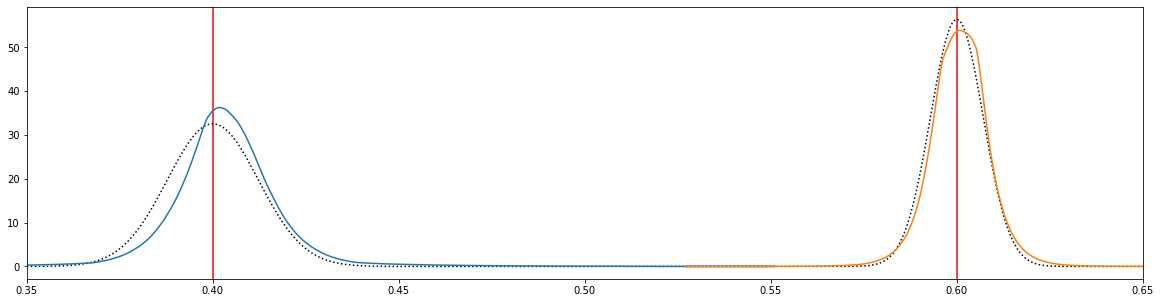

In [10]:
plt.figure(figsize=(20, 5))
for i in range(2):
    z, p = sw.posterior(i, version = -1)
    plt.axvline(z0[i],color='red')
    plt.plot(z, stats.norm.pdf(z, z0[i], err[i]), 'k:')
    plt.plot(z, p)
    s = swyft.get_stats(z, p)
    print(s['err68']/err[i], s['err95']/err[i])
plt.xlim([0.35, 0.65])

In [22]:
# Fisher analysis
NDIM=2
grad = []
for i in range(0, NDIM):
    dz = np.zeros(NDIM)
    d = 0.001
    dz[i] += d
    g = (model(z1+dz) - model(z1))/d
    grad.append(g)

I = np.zeros((NDIM, NDIM))

for i in range(NDIM):
    for j in range(NDIM):
        I[i, j] = (grad[i]*grad[j]).sum()/SIGMA**2
              
Cov = np.linalg.inv(I)
err = np.diag(Cov)**0.5
print(err)

[0.01224745 0.00707107]


1.0376052489121161 1.9354725389036105
1.0301531909731114 1.8966823329540319


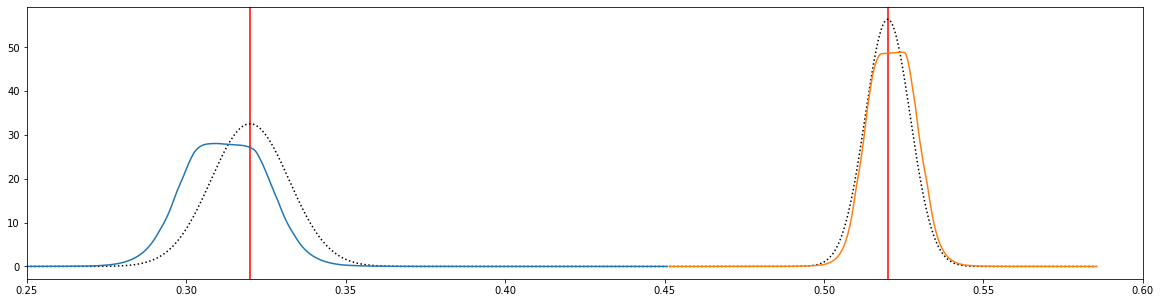

In [38]:
plt.figure(figsize=(20, 5))
for i in range(2):
    z, p = sw2.posterior(i, version = -1,x0=x1)
    plt.axvline(z1[i],color='red')
    plt.plot(z, stats.norm.pdf(z, z1[i], err[i]), 'k:')
    plt.plot(z, p)
    s = swyft.get_stats(z, p)
    print(s['err68']/err[i], s['err95']/err[i])
plt.xlim([0.25, 0.6]);

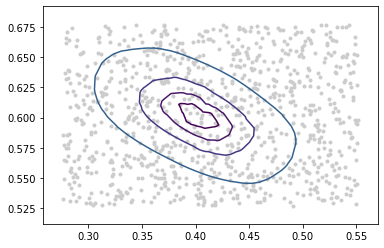

In [36]:
zgrid, lnLgrid = sw.posterior([0, 1])
plt.scatter(zgrid[:,0], zgrid[:,1], marker='.', color='0.8')
max_lnL = lnLgrid[:].max()
plt.tricontour(zgrid[:,0], zgrid[:,1], -lnLgrid+max_lnL, levels = [1, 4, 9, 16, 50])
#plt.xlim([0, 1])
#plt.ylim([0, 1])

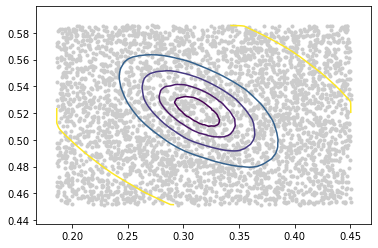

In [37]:
zgrid, lnLgrid = sw2.posterior([0, 1])
plt.scatter(zgrid[:,0], zgrid[:,1], marker='.', color='0.8')
max_lnL = lnLgrid[:].max()
plt.tricontour(zgrid[:,0], zgrid[:,1], -lnLgrid+max_lnL, levels = [1, 4, 9, 16, 50])
#plt.xlim([0, 1])
#plt.ylim([0, 1])